## Hierarchical Clustering & Collaborative Recommendation Systems: <br>An Exercise in Unsupervised Learning ##

### Background Information ###

The following is a simple demonstration of how hierarchical clustering is used in collaborative product recommendation systems. These systems are a vital component of the recommendation engines used by Netflix, Amazon, and similar e-tailers. Their purpose is to identify goods an individual might be inclined to buy based on 1) his/her rating of similar products and 2) product ratings entered by others.

(source: MITx)

### The Problem ###

A buyer has demonstrated a fondness for the film "Men in Black (1997)." Use a collaborative recommendation system driven by hierarchical clustering to identify other films this individual might enjoy.

(source: MITx)

### The Data ###

In [28]:
movies = read.table("movie_lens.txt", header=FALSE, sep="|", quote="\"")

### Data Structure ###

The data structure print-out below reveals our data have no column names. R has provided generic ones: V1, V2, V3, etc.

In [29]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ V1 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2 : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ V3 : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ V4 : logi  NA NA NA NA NA NA ...
 $ V5 : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact?%22Langoliers,%20The%22%20(1995)%20(mini)",..: 1430 564 504 542 309 1661 1452 102 356 1182 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 1 0 1 0 0 0 0 0 0 ...
 $ V8 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ V9 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V10: int  1 0 0 0 0 0 0 1 0 0 ...
 $ V11: int  1 0 0 1 0 0 0 1 0 0 ...
 $ V12: int  0 0 0 0 1 0 0 0 0 0 ...
 $ V13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V14: int  0 0 0 1 1 1 1 1 1 1 ...
 $ V15: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V16: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V20: i

We prefer to work with meaningful column names. The code below adds them.

In [30]:
colnames(movies) = c("ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western")

The revised data structure is now much more user friendly.

In [31]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title           : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ ReleaseDate     : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ VideoReleaseDate: logi  NA NA NA NA NA NA ...
 $ IMDB            : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact?%22Langoliers,%20The%22%20(1995)%20(mini)",..: 1430 564 504 542 309 1661 1452 102 356 1182 ...
 $ Unknown         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action          : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation       : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens       : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy          : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime           : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama           : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy  

Not all variables will be of use to us. Below, we remove the following features: "ID", "ReleaseDate", "VideoReleaseDate", "IMDB."

In [32]:
cols_remove = c("ID", "ReleaseDate", "VideoReleaseDate", "IMDB")
movies[cols_remove] = NULL

Duplicate entries exist in our data set. We correct the problem by overwriting the existing data set with one containing only unique entries.

In [23]:
movies = unique(movies)

In [24]:
str(movies)

'data.frame':	1664 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Western    : int  0 0 0 0 0

### Data Summary ###

The data set is complete insofar as there are no missing values.

In [33]:
summary(movies)

                            Title         Unknown             Action      
 Body Snatchers (1993)         :   2   Min.   :0.000000   Min.   :0.0000  
 Butcher Boy, The (1998)       :   2   1st Qu.:0.000000   1st Qu.:0.0000  
 Chairman of the Board (1998)  :   2   Median :0.000000   Median :0.0000  
 Chasing Amy (1997)            :   2   Mean   :0.001189   Mean   :0.1492  
 Deceiver (1997)               :   2   3rd Qu.:0.000000   3rd Qu.:0.0000  
 Designated Mourner, The (1997):   2   Max.   :1.000000   Max.   :1.0000  
 (Other)                       :1670                                      
   Adventure         Animation         Childrens           Comedy      
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.0000  
 Mean   :0.08026   Mean   :0.02497   Mean   :0.07253   Mean   :0.3002  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd

### Exploratory Data Analysis ###

To get a better idea of the content in our data set, we perform the following queries.

Comedies in dataset:

In [34]:
sum(movies$Comedy)

[1] 505

Westerns in dataset:

In [35]:
sum(movies$Western)

[1] 27

Films tagged as both romances and dramas in dataset.

In [36]:
nrow(movies[movies$Drama==1 & movies$Romance==1,])

[1] 99

### Hierarchical Clustering: A Two Stage Process###

Step 1: Compute distances between points

In [37]:
distances = dist(movies[2:20], method="euclidean")

Step 2: Cluster the points & plot dendrogram

The Ward method, used below, contemplates both the centroid distance between clusters, as well as the variance within each cluster.

In [40]:
clusterMovies = hclust(distances, method="ward.D")

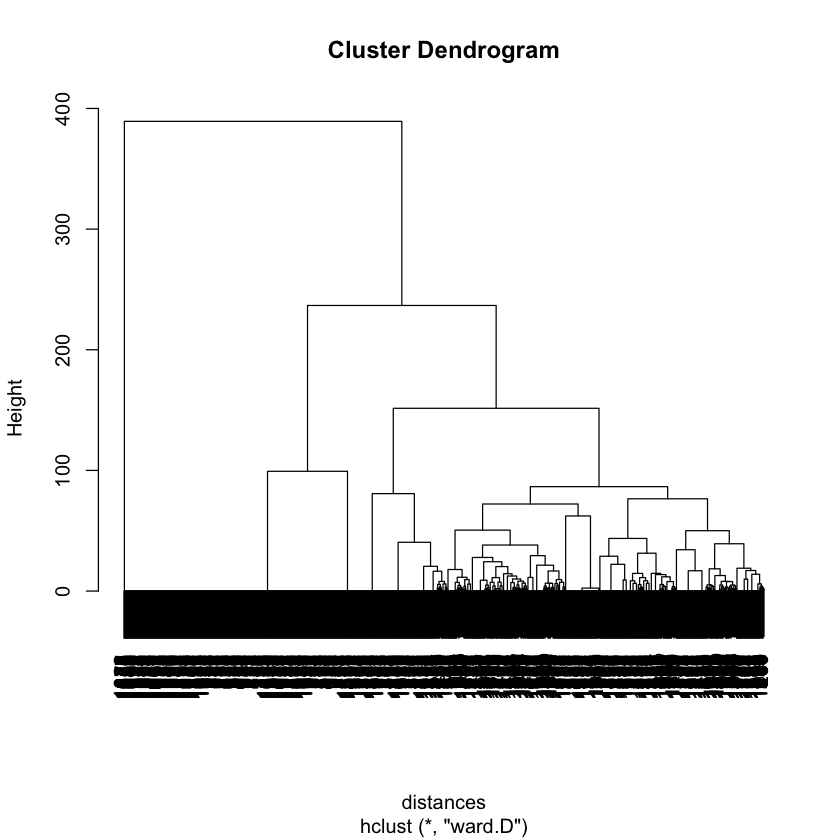

In [39]:
plot(clusterMovies)

Based on the dendrogram and our knowledge of problem, 10 clusters were selected. The following command assigns each data point (i.e., movie) to a cluster.

In [17]:
clusterGroups = cutree(clusterMovies, k=10)

Here, we subset the data by cluster and calculate each cluster's mean. 

In [18]:
spl = split(movies[2:20], clusterGroups)
lapply(spl, colMeans)

$`1`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
0.006734007 0.178451178 0.185185185 0.134680135 0.393939394 0.363636364 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
0.033670034 0.010101010 0.306397306 0.070707071 0.000000000 0.016835017 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
0.188552189 0.000000000 0.104377104 0.074074074 0.040404040 0.225589226 
    Western 
0.090909091 

$`2`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
0.000000000 0.783919598 0.351758794 0.010050251 0.005025126 0.065326633 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
0.005025126 0.000000000 0.110552764 0.000000000 0.000000000 0.080402010 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
0.000000000 0.000000000 0.045226131 0.346733668 0.376884422 0.015075377 
    Western 
0.000000000 

$`3`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
0.000000000 0.123853211 0.036697248 0.000000000 0.009174312 0.064220183 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
0.412844037 0.000000000 0.380733945 0.004587156 0.105504587 0.018348624 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
0.000000000 0.275229358 0.036697248 0.041284404 0.610091743 0.000000000 
    Western 
0.000000000 

$`4`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
          0           0           0           0           0           0 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
          0           0           1           0           0           0 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
          0           0           0           0           0           0 
    Western 
          0 

$`5`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
          0           0           0           0           0           1 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
          0           0           0           0           0           0 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
          0           0           0           0           0           0 
    Western 
          0 

$`6`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
  0.0000000   0.1015625   0.0000000   0.0000000   0.0000000   0.1093750 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
  0.0468750   0.0000000   0.6640625   0.0000000   0.0078125   0.0156250 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
  0.0000000   0.0000000   1.0000000   0.0000000   0.1406250   0.0000000 
    Western 
  0.0000000 

$`7`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
          0           0           0           0           0           1 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
          0           0           0           0           0           0 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
          0           0           1           0           0           0 
    Western 
          0 

$`8`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
  0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0212766 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
  0.0000000   1.0000000   0.0000000   0.0000000   0.0000000   0.0000000 
    Musical     Mystery     Romance      Sci-Fi    Thriller         War 
  0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0212766 
    Western 
  0.0000000 

$`9`
    Unknown      Action   Adventure   Animation   Childrens      Comedy 
          0           0           0           0           0           1 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
          0     

Next, we locate the cluster to which "Men in Black (1997)" belongs.

In [25]:
subset(movies, Title=="Men in Black (1997)")

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
257,Men in Black (1997),0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


"Men in Black (1997)" is on row 257. To find its cluster, we index into our cluster groups using its row number. We discover "Men in Black (1997)" is domiciled in cluster 2 -- the action/adventure/sci-fi cluster.

In [41]:
clusterGroups[257]

257 
  2

Below, we further explore cluster two for movies similar to "Men in Black (1997)."

In [27]:
cluster2 = subset(movies, clusterGroups==2)

In [22]:
cluster2$Title[1:10]

[1] GoldenEye (1995)                              
 [2] Bad Boys (1995)                               
 [3] Apollo 13 (1995)                              
 [4] Net, The (1995)                               
 [5] Natural Born Killers (1994)                   
 [6] Outbreak (1995)                               
 [7] Stargate (1994)                               
 [8] Fugitive, The (1993)                          
 [9] Jurassic Park (1993)                          
[10] Robert A. Heinlein's The Puppet Masters (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

**Based on the results above, our collaborative movie recommendation system would recommend the following films to an individual who enjoyed "Men in Black (1997)":**    GoldenEye (1995), Bad Boys (1995), Apollo 13 (1995), Net, The (1995), Natural Born Killers (1994), Outbreak (1995), Stargate (1994), Fugitive, The (1993), Jurassic Park (1993), Robert A. Heinlein's The Puppet Masters (1994).

Note that our recommendation system is limited by 1) the number of films in our database and 2) how they are scored. Systems that depend on user ratings will confront the additional limitation of user participation in the ratings process.